# Problem Statement

Airbnb Inc is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Airbnb has close to 150 million customers across the world. Price is the most important factor considered by the customer while making booking into a property. Strategic pricing of the properties is important to avoid losing customers to the competitors.  
  
We have a data of 74111 Airbnb properties across the nations. Based on this data build a simple and multiple linear regression model to predict the strategic pricing of a new listed property on Airbnb.


In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

### Importing data

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("AirBNB.csv")  

C:\Users\IT\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### EDA

In [3]:
# Check top few records to get a feel of the data structure
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [4]:
# drop the id column as it is useless for the model
df = df.drop('id', axis=1)

In [5]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
room_type               74106 non-null object
accommodates            74108 non-null float64
bathrooms               73908 non-null float64
cancellation_policy     74103 non-null object
cleaning_fee            74107 non-null object
instant_bookable        74111 non-null object
review_scores_rating    57389 non-null float64
bedrooms                74019 non-null float64
beds                    73980 non-null float64
log_price               74111 non-null float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [7]:
df.describe(include="all")

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,74106,74108.000000,73908.000000,74103,74107,74111,57389.000000,74019.000000,73980.000000,74111.000000
unique,3,NaN,NaN,3,2,2,NaN,NaN,NaN,NaN
top,Entire home/apt,NaN,NaN,strict,True,f,NaN,NaN,NaN,NaN
freq,41308,NaN,NaN,32500,54399,54660,NaN,NaN,NaN,NaN
mean,NaN,3.155125,1.235272,NaN,NaN,NaN,94.067365,1.265797,1.710868,4.782069
std,NaN,2.153603,0.582054,NaN,NaN,NaN,7.836556,0.852149,1.254142,0.717394
min,NaN,1.000000,0.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,1.000000,NaN,NaN,NaN,92.000000,1.000000,1.000000,4.317488
50%,NaN,2.000000,1.000000,NaN,NaN,NaN,96.000000,1.000000,1.000000,4.709530
75%,NaN,4.000000,1.000000,NaN,NaN,NaN,100.000000,1.000000,2.000000,5.220356


### unique values for categorical variables

In [8]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

ROOM_TYPE :  3
Shared room         2163
Private room       30635
Entire home/apt    41308
Name: room_type, dtype: int64


CANCELLATION_POLICY :  3
moderate    19060
flexible    22543
strict      32500
Name: cancellation_policy, dtype: int64


CLEANING_FEE :  2
False    19708
True     54399
Name: cleaning_fee, dtype: int64


INSTANT_BOOKABLE :  2
t    19451
f    54660
Name: instant_bookable, dtype: int64




Practically, rental price hardly depends upon whether the property is instantly bookable or not, when compared to other predictors. So, this variable is not useful to us and can be dropped

In [9]:
# Dropping instant_bookable
df.drop('instant_bookable',axis=1,inplace=True)

### Converting categorical to dummy variables

In [10]:
df = pd.get_dummies(df, columns=['room_type','cancellation_policy','cleaning_fee'])

In [11]:
df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_False,cleaning_fee_True
0,3.0,1.0,100.0,1.0,1.0,5.010635,1,0,0,0,0,1,0,1
1,7.0,1.0,93.0,3.0,3.0,5.129899,1,0,0,0,0,1,0,1
2,5.0,1.0,92.0,1.0,3.0,4.976734,1,0,0,0,1,0,0,1
3,4.0,1.0,NaN,2.0,2.0,6.620073,1,0,0,1,0,0,0,1
4,2.0,1.0,40.0,0.0,1.0,4.744932,1,0,0,0,1,0,0,1


In [12]:
# Are there any missing values ?
df.isnull().sum()

accommodates                        3
bathrooms                         203
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
room_type_Entire home/apt           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_flexible        0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_False                  0
cleaning_fee_True                   0
dtype: int64

### Imputing missing values

In [13]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()        

accommodates                    0
bathrooms                       0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Entire home/apt       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_flexible    0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_False              0
cleaning_fee_True               0
dtype: int64

In [14]:
df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_False,cleaning_fee_True
0,3.0,1.0,100.000000,1.0,1.0,5.010635,1,0,0,0,0,1,0,1
1,7.0,1.0,93.000000,3.0,3.0,5.129899,1,0,0,0,0,1,0,1
2,5.0,1.0,92.000000,1.0,3.0,4.976734,1,0,0,0,1,0,0,1
3,4.0,1.0,94.067365,2.0,2.0,6.620073,1,0,0,1,0,0,0,1
4,2.0,1.0,40.000000,0.0,1.0,4.744932,1,0,0,0,1,0,0,1


In [15]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_False,cleaning_fee_True
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.00000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069,0.55738,0.413366,0.029186,0.304179,0.257182,0.438531,0.265925,0.734021
std,2.153559,0.581256,6.896002,0.851620,1.253033,0.717394,0.49670,0.492441,0.168329,0.460062,0.437083,0.496211,0.441828,0.441856
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,93.000000,1.000000,1.000000,4.317488,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,94.067365,1.000000,1.000000,4.709530,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,1.000000,99.000000,1.000000,2.000000,5.220356,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking for duplicates

In [16]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 24248


In [17]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (74111, 14)
After (49863, 14)


In [18]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Correlation Plot

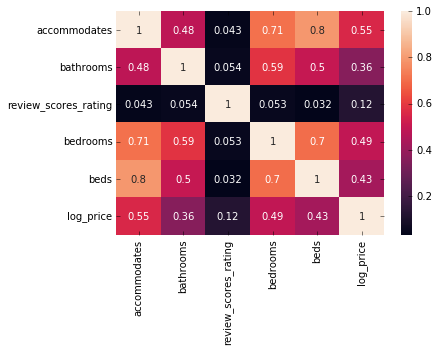

In [19]:
sns.heatmap(df.iloc[:, 0:6].corr(),annot=True)

Since accomodates and beds are having a high positive correlation, 1 of these variables can be dropped.  
Likewise accomodates and bedrooms are also highly correlated

In [20]:
# Dropping beds and bedrooms
df.drop(['beds','bedrooms'], axis = 1,inplace=True)

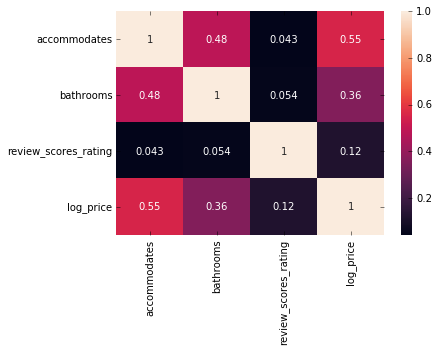

In [21]:
sns.heatmap(df.iloc[:, 0:4].corr(),annot=True)

In [22]:
df.head()

,accommodates,bathrooms,review_scores_rating,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_False,cleaning_fee_True
0,3.0,1.0,100.000000,5.010635,1,0,0,0,0,1,0,1
1,7.0,1.0,93.000000,5.129899,1,0,0,0,0,1,0,1
2,5.0,1.0,92.000000,4.976734,1,0,0,0,1,0,0,1
3,4.0,1.0,94.067365,6.620073,1,0,0,1,0,0,0,1
4,2.0,1.0,40.000000,4.744932,1,0,0,0,1,0,0,1


### Outlier Checks

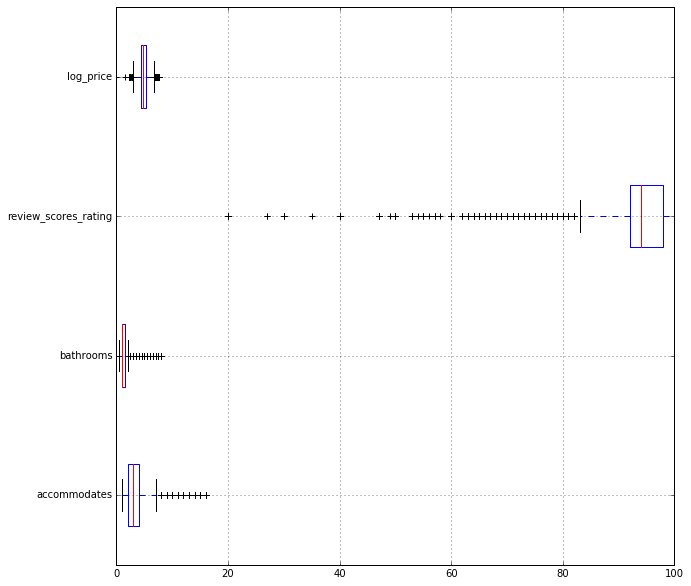

In [23]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.iloc[:, 0:4].boxplot(vert=0)

In [24]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [25]:
for column in df.iloc[:, 0:4].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

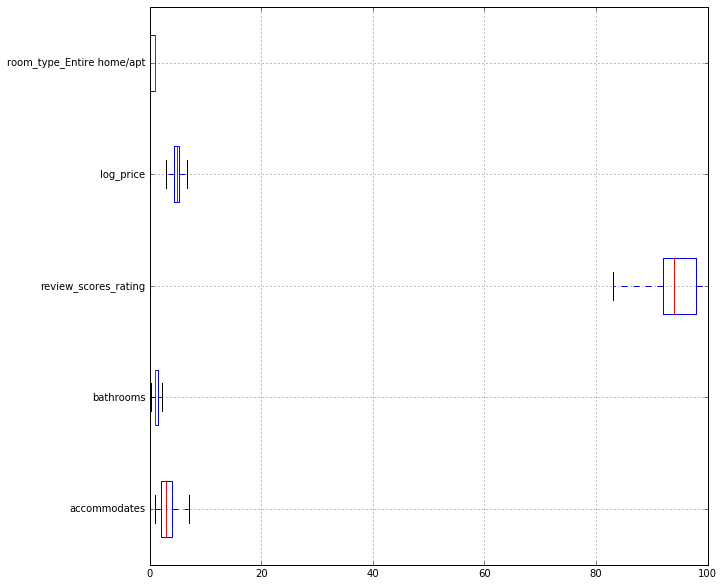

In [26]:
plt.figure(figsize=(10,10))
df.iloc[:, 0:5].boxplot(vert=0)

### Data Distribution

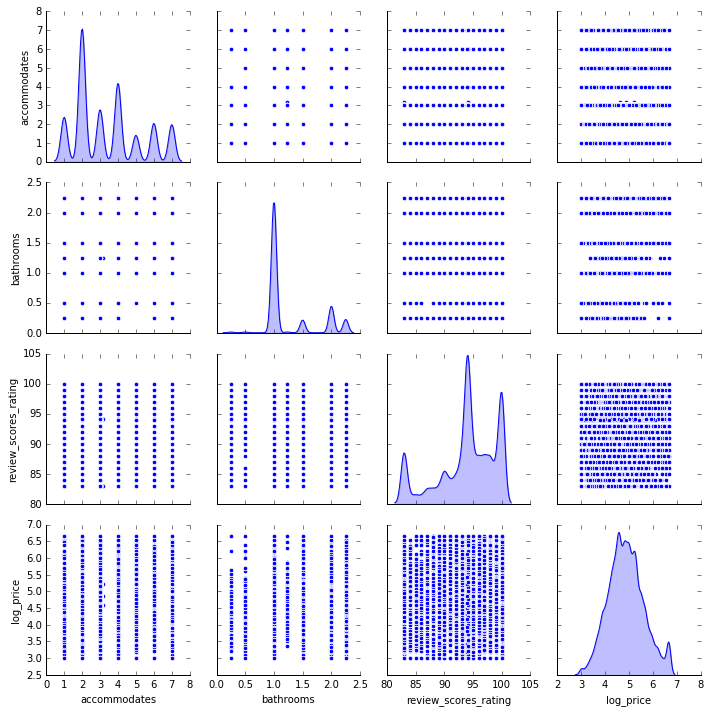

In [27]:
df_attr = (df.iloc[:, 0:4])
sns.pairplot(df_attr, diag_kind='kde')   

### Train-Test Split

In [28]:
# Copy all the predictor variables into X dataframe
X = df.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df[['log_price']]


In [29]:
X.head()

,accommodates,bathrooms,review_scores_rating,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_False,cleaning_fee_True
0,3.0,1.0,100.000000,1,0,0,0,0,1,0,1
1,7.0,1.0,93.000000,1,0,0,0,0,1,0,1
2,5.0,1.0,92.000000,1,0,0,0,1,0,0,1
3,4.0,1.0,94.067365,1,0,0,1,0,0,0,1
4,2.0,1.0,83.000000,1,0,0,0,1,0,0,1


In [30]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

### Linear Regression Model

In [31]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for accommodates is 0.11963188518107246
The coefficient for bathrooms is 0.26467344579200774
The coefficient for review_scores_rating is 0.013530540500791721
The coefficient for room_type_Entire home/apt is 0.3158709222256496
The coefficient for room_type_Private room is -0.2752767666221599
The coefficient for room_type_Shared room is -0.7488267331271039
The coefficient for cancellation_policy_flexible is 0.061204668917265184
The coefficient for cancellation_policy_moderate is -0.011720281886045774
The coefficient for cancellation_policy_strict is 0.04810251404254138
The coefficient for cleaning_fee_False is -0.10658378819086502
The coefficient for cleaning_fee_True is -0.19316789586247263


In [33]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2.9173992582937798


In [34]:
# R square on training data
regression_model.score(X_train, y_train)

0.4877185286972334

49% of the variation in the log_price is explained by the predictors in the model

In [35]:
# R square on testing data
regression_model.score(X_test, y_test)

0.493549043884965

### Linear Regression using statsmodels

In [36]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,accommodates,bathrooms,review_scores_rating,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_False,cleaning_fee_True,log_price
12991,2.0,1.0,100.000000,1,0,0,0,0,1,0,1,4.941642
28328,1.0,0.5,92.000000,1,0,0,0,0,1,0,1,4.605170
50154,4.0,1.0,94.000000,1,0,0,0,0,1,0,1,5.241747
71704,2.0,1.0,94.067365,1,0,0,1,0,0,1,0,6.232448
45781,1.0,1.0,100.000000,0,1,0,0,0,1,1,0,4.143135


In [37]:
# Renaming columns for simplicity
data_train.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

In [38]:
data_train.columns

Index(['accommodates', 'bathrooms', 'review_scores_rating',
       'room_type_entire_home', 'room_type_private_room',
       'room_type_shared_room', 'cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_False', 'cleaning_fee_True', 'log_price'],
      dtype='object')

In [39]:
expr= 'log_price ~ accommodates + bathrooms + review_scores_rating + room_type_entire_home + room_type_private_room + room_type_shared_room + cancellation_policy_flexible + cancellation_policy_moderate + cancellation_policy_strict + cleaning_fee_False + cleaning_fee_True'

In [40]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                       2.917399
accommodates                    0.119632
bathrooms                       0.264673
review_scores_rating            0.013531
room_type_entire_home           0.315871
room_type_private_room         -0.275277
room_type_shared_room          -0.748827
cancellation_policy_flexible    0.061205
cancellation_policy_moderate   -0.011720
cancellation_policy_strict      0.048103
cleaning_fee_False             -0.106584
cleaning_fee_True              -0.193168
dtype: float64

In [41]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     3236.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:34:24   Log-Likelihood:                -29343.
No. Observations:               37397   AIC:                         5.871e+04
Df Residuals:                   37385   BIC:                         5.881e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [42]:
# Calculate MSE
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [43]:
import math

math.sqrt(mse)

0.5322628719075794

In [44]:
# Prediction on Test data
y_pred = regression_model.predict(X_test)

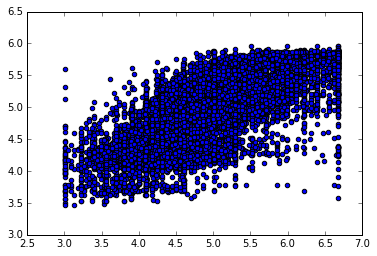

In [45]:
plt.scatter(y_test['log_price'], y_pred)

 # Conclusion

The final Linear Regression equation is  
  
log_price = b0 + b1*accomodates + b2*bathrooms + b3*review_scores_rating + b4*room_type_entire_home + b5*room_type_private_room + b6*room_type_shared_room + 
b7*cancellation_policy_flexible + b8*cancellation_policy_moderate + b9*cancellation_policy_strict + b10*cleaning_fee_False + b11*cleaning_fee_True  
  
<b>log_price = 2.917 + 0.1196*accomodates + 0.2646*bathrooms + 0.0135*review_scores_rating + 0.3158*room_type_entire_home + -0.275*room_type_private_room + -0.7488*room_type_shared_room + 0.0612*cancellation_policy_flexible + -0.0117*cancellation_policy_moderate + 0.0481*cancellation_policy_strict + -0.1065*cleaning_fee_False + -0.193*cleaning_fee_True</b>  
  
When accomodates increases by 1 unit, log_price increases by 0.1196 units, keeping all other predictors constant.  
similarly, when no. of bathrooms increases by 1 unit, log_price increases by 0.2646 units, keeping all other predictors constant.
  
  
There are also some negative co-efficient values, for instance, room_type_shared_room has its corresponding co-efficient as -0.7488. This implies, when the room type is shared room, the log_price decreases by 0.748 units, keeping all other predictors constant.  
Note: If shared room is present, then the value for private room and entire home will be 0 in the input data. Likewise for any other case in the dummy variables
  
Higher the magnitude, most important is that predictor 